In [507]:
import numpy as np
from random import randint, shuffle
import math
import networkx as nx
import matplotlib.pyplot as plt

In [508]:
def graficar_flujo_distancia(flujo, distancia):
    n = len(flujo)
    G = nx.Graph()
    pos = {}
    labels = {}
    for i in range(n):
        G.add_node(i)
        pos[i] = (np.random.uniform(), np.random.uniform())
        labels[i] = str(i)
    for i in range(n):
        for j in range(n):
            G.add_edge(i, j, weight=flujo[i][j]*distancia[i][j])
    edge_labels = {(i, j): flujo[i][j]*distancia[i][j] for i, j in G.edges()}
    nx.draw(G, pos, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

In [510]:

def costo_qap(flujo, distancia, solucion):
    n = len(solucion)
    costo = 0
    for i in range(n):
        for j in range(n):
            fi = solucion[i]
            fj = solucion[j]
            costo += flujo[i][j] * distancia[fi][fj]
    return costo

In [511]:
def generaVecindario(A):

    inicio = randint(1,len(A)-2)
    final = randint(inicio+2, len(A))

    subA = A[inicio:final]
    shuffle(subA)
    inicioA = A[:inicio]
    finalA = A[final:]
    
    vecino = np.concatenate((inicioA, subA, finalA))

    return vecino

In [512]:

def graficar_arreglo(arr):
    # Crear una lista de índices para usar en el eje x
    x = range(len(arr))

    # Definir el número de valores que se mostrarán en el gráfico
    num_valores_mostrados = 100

    # Calcular el tamaño de paso para seleccionar los valores a mostrar
    paso = int(len(arr) / num_valores_mostrados)

    # Seleccionar los valores a mostrar
    y = arr[::paso]
    x = x[::paso]

    # Generar el gráfico de líneas
    plt.plot(x, y)

    # Agregar etiquetas a los ejes
    plt.xlabel('Índice')
    plt.ylabel('Valor')

    # Mostrar el gráfico
    plt.show()


In [609]:
def recocidoSimulado(T0, Tf, alpha, flujo, distancia, n):
    T = T0
    solucionA = np.random.permutation(n)

    coste = []

    while T > Tf:

        for i in range(n):
            solucionB = generaVecindario(solucionA)

            delta = costo_qap(flujo,distancia,solucionA) - costo_qap(flujo,distancia,solucionB)

            if delta > 0:
                solucionB = solucionA
                coste.append(costo_qap(flujo,distancia,solucionB))
            else:
                P = math.exp(-delta/T)
                r = randint(0,100)/100
                if r<P:
                    solucionB = solucionA
                    coste.append(costo_qap(flujo,distancia,solucionB))
                    
        T = alpha*T

    print(coste[len(coste)-1])
    print(solucionB)

    return coste


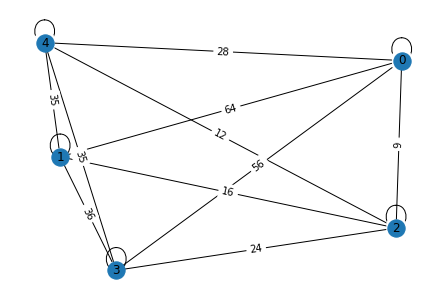

In [622]:
n = 5

flujo = np.random.randint(1,10, size=(n, n))
distancia = np.random.randint(1,10, size=(n, n))

graficar_flujo_distancia(flujo, distancia)

531
[3 1 4 0 2]


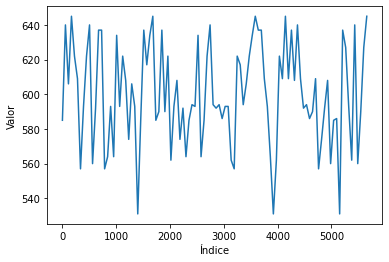

In [659]:
graficar_arreglo(recocidoSimulado(100,0.001,0.99,flujo,distancia,n))